# Natural Language Processing

Some important definitions:

- **Term Frequency**: Importance of the term within a document, or number of occurrences of term t in document d.
- **Inverse Document Frequency**: Importance of the term in the corpus, or the log(D/t), where D is the total number of documents, and t is the number of documents with the term.
    

Mathematically, TF-IDF can be expressed as:

w = tf(x,y) x log(N / df(x) )

In [4]:
import nltk

In [5]:
#nltk.download_shell()

Go to this [link](https://archive.ics.uci.edu/ml/index.php) to explore datasets from UCI. We are using one of those, the spam dataset, to build a spam detection filter.

In [6]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [7]:
print(len(messages))

5574


In [8]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

So this is a list of texts

In [10]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

Ham or Spam?

In [11]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [12]:
import pandas as pd

In [13]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [14]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [16]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

The better your domain knowledge on the data, the better feature engineering that you are capable of doing.

In [17]:
messages['length'] = messages['message'].apply(len)

In [18]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

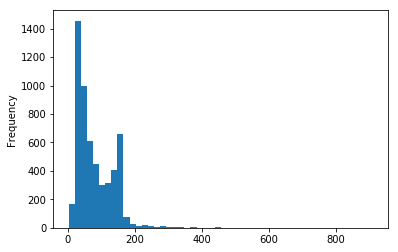

In [20]:
messages['length'].plot.hist(bins=50)

Text length seems to be a bi-modal feature, meaning something to be considered for bi-modal separation

In [21]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [26]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

**He's a romantic!**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b521a7cc0>,
      dtype=object)

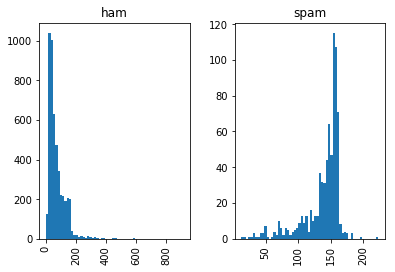

In [27]:
messages.hist(column='length', by='label', bins=60)

There is a trend there: spam tends to have more characters

In [28]:
import string

In [29]:
mess = 'Sample message! Notice: it has punctuation'

In [30]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
"".join([c for c in mess if c not in string.punctuation])

'Sample message Notice it has punctuation'

We can do the same with stopwords

In [32]:
from nltk.corpus import stopwords

In [34]:
stopwords.words('english') # very common words with no meaning

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
nopunc = "".join([c for c in mess if c not in string.punctuation])

In [37]:
nopunc

'Sample message Notice it has punctuation'

In [38]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [39]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [40]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

The words 'it' and 'has' have disappeared

In [42]:
def text_process(mess):
    """
    1. Remove punctuation
    2. Remove stopwords
    """
    nopunc = "".join([c for c in mess if c not in string.punctuation]) #the same we used before
    clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_mess

In [43]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

But we can use built-in functions in nltk for this

## Vectorization

Now we are using TF-IDF model:
1. Count how many times does a word occurr in each message (TF)
2. Weight the counts so that frequent tokens get lower weight (IDF)
3. Normalize vectors to unit length so that the dot product is the cosine of both vectors (L2 norm)

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word M Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>

Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
bag_of_words_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

It takes a lot of time to come up with the matrix

In [48]:
print(len(bag_of_words_transformer.vocabulary_))

11425


In [49]:
mess4 = messages['message'][3]

In [50]:
mess4

'U dun say so early hor... U c already then say...'

In [52]:
bow4 = bag_of_words_transformer.transform([mess4])

In [53]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


Which ones appear twice?

In [54]:
bag_of_words_transformer.get_feature_names()[4068]

'U'

In [55]:
bag_of_words_transformer.get_feature_names()[9554]

'say'